<a href="https://colab.research.google.com/github/nasiksami/Deep-Learning/blob/main/Simple_image_classifier_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Neural Network building with fashion_mnist data**

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

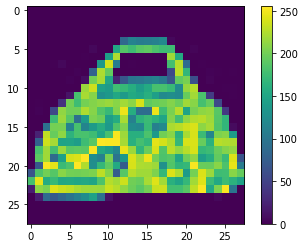

In [ ]:
plt.figure()
plt.imshow(train_images[494])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
##Data Preprocessing

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#this is very important cause if the image pixel number is very high, it will take
#much more time to reach to global minima but in this way we will convert all the images 
#into 0 to 1
#train test both must be done 

In [ ]:
##model building
#sequencial is just simple one 
#the data will move from left to right 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)    #flatten makes 28*28 to 784 
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)   #first hidden layer. Dense meaning fully connected, 128 randomly taken. 
    keras.layers.Dense(10, activation='softmax') # output layer (3)   #O/P layers. The number is same as the numnber of categories we have 
                                                                      #softmax makes the output value ranging between 0 and 1
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
###Compile the Model
#optimizer adam will help to get the global minima 
#loss is sparse categorical crossentropy 


In [ ]:
#training 

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3729 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2653 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2542 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2451 - accuracy: 0.9091
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [ ]:
#evaluating the model # verbose is how much it is showing on the output
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8853
Test accuracy: 0.8852999806404114


In [ ]:
#accuracy is lesser in testing than in the training. Which means overfitting.
#too many epochs are also not good. 

In [ ]:
#prediction
predictions = model.predict(test_images)
print (predictions[0])

[3.4228673e-08 9.4523304e-13 2.4998233e-08 1.4249187e-12 1.2053584e-09
 3.0163871e-04 5.9930137e-08 2.7847087e-03 3.9086274e-08 9.9691355e-01]


In [ ]:
test_labels[0]

9

In [ ]:
print(np.argmax(predictions[0]))

9


Trouser


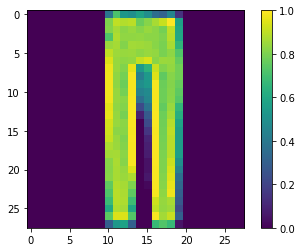

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[214])])
plt.figure()
plt.imshow(test_images[214])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 777


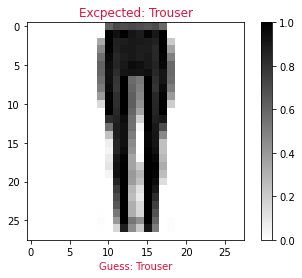

In [ ]:
COLOR = 'crimson'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
